<a href="https://colab.research.google.com/github/Trrunghau/AI/blob/week9/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from keras.datasets import fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

.. 1


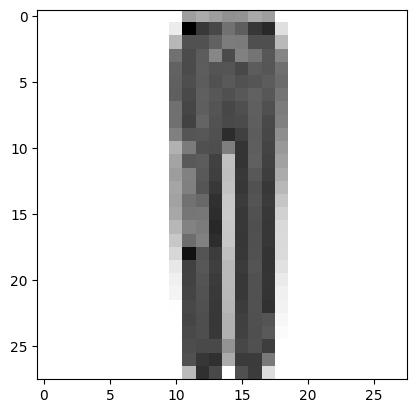

In [61]:
hinh = train_images[1000]
import matplotlib.pyplot as plt

plt.imshow(hinh,cmap = plt.cm.binary)
plt.show
print('..',train_labels[1000])


In [62]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

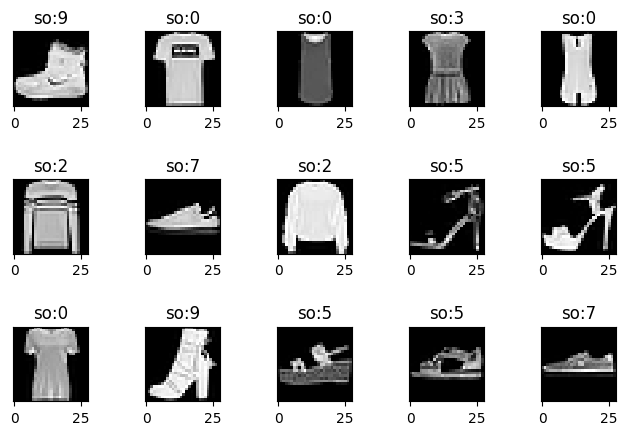

In [69]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title('so:{}'.format(train_labels[i]))
  plt.xticks
  plt.yticks([])

In [70]:
from keras import models
from keras.layers import Dense

In [71]:
from keras.models.cloning import Sequential
model=Sequential()
model.add(Dense(512,activation='relu',input_shape = (28*28,),name='layout1'))
#model.add(Dense(512,activation='relu',name='layout2'))
model.add(Dense(10,activation='softmax',name='layoutN')) 
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layout1 (Dense)             (None, 512)               401920    
                                                                 
 layoutN (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [72]:
train_images=train_images.reshape((60000,28*28)) # đổi đầu vào thành 1 dãy
train_images=train_images.astype('float32')/255 # đổi kiểu int sang float
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

from keras.utils import to_categorical  # chuyển output sang số 1 nổi, 1 lần  
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [73]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics= ['accuracy'])
model.fit(train_images,train_labels,epochs=15,batch_size=128)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('độ chính xác:',test_acc)
print('hàm mất mát',test_loss)

Epoch 1/15
469/469 [==============================] - 5s 11ms/step - loss: 0.5614 - accuracy: 0.8005
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3848 - accuracy: 0.8587
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3398 - accuracy: 0.8748
Epoch 4/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3137 - accuracy: 0.8840
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 0.2934 - accuracy: 0.8908
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.2777 - accuracy: 0.8967
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 0.2664 - accuracy: 0.9012
Epoch 8/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2521 - accuracy: 0.9061
Epoch 9/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2415 - accuracy: 0.9084
Epoch 10/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2353 - accuracy: 0.913

In [75]:
model.save('fashion_mnist.h5')

In [76]:
from keras.models import load_model
model11 = load_model('fashion_mnist.h5')
model11.summary()
print(model11.predict([test_images]))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layout1 (Dense)             (None, 512)               401920    
                                                                 
 layoutN (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step
[[5.5412976e-09 3.3632372e-09 4.4020276e-09 ... 1.1383537e-04
  1.7710253e-08 9.9987870e-01]
 [3.7619907e-06 1.4450235e-14 9.9990767e-01 ... 2.5375205e-12
  2.3795514e-15 7.6131748e-14]
 [4.8107518e-09 9.9999994e-01 7.2769628e-13 ... 1.9793881e-17
  4.2845193e-17 3.4737769e-16]
 ...
 [2.2390948e-07 1.5888703e-15 6.9196105e-08 ... 3.5754830e-08
  9.9999923e-01 7.3138842e-14]
 [2.6773705e

In [77]:
classes = ['T_shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

1/1 [==============================] - 0s 29ms/step
dự đoán:  shirt


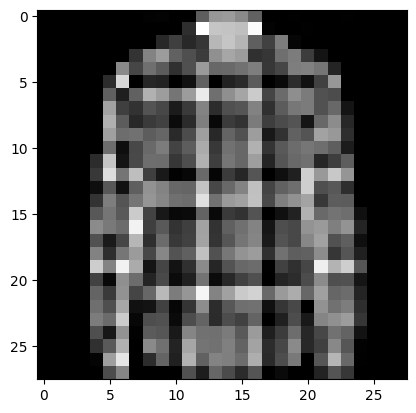

In [106]:
plt.imshow(test_images[7].reshape(28,28), cmap='gray')
import numpy as np
y_predict = model11.predict(test_images[7].reshape(1,28*28))
print('dự đoán: ', classes[np.argmax(y_predict)])

1/1 [==============================] - 0s 48ms/step
dự đoán:  bag


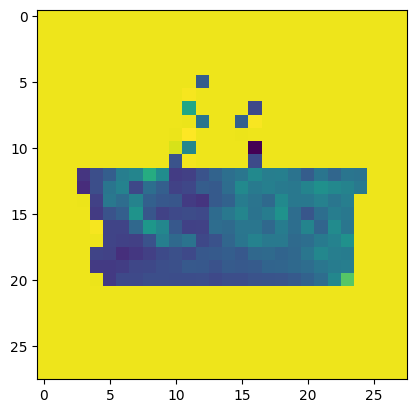

In [112]:
from keras.utils import load_img
from keras.utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np

img = load_img(r'bag.jpg', target_size=(28,28))
img = img.convert('L')
plt.imshow(img)

model1 = load_model('fashion_mnist.h5')
img = img_to_array(img)
img = img.reshape(1,28*28)
img = img.astype('float32') / 255
kq = model1.predict(img.reshape(1,28*28))
print('dự đoán: ', classes[np.argmax(kq)])